In [6]:
library(ggplot2)
library(lattice)
library(plyr)
library(Rmisc)
library(tidyr)
set.seed(301)

m <- 800
lambda_not_contaminated <- 3.13
lambda_contaminated <- 0.53
theoric_confidence_interval <- 0.94
dimensions <- seq(100, 2500, 100)
epsilon <- 0.25

not_contaminated <- c()
contaminated <- c()
for (n in dimensions) {
  mean_widths <- calculate_mean_widths(n)
  not_contaminated <- c(not_contaminated, mean_widths[1])
  contaminated <- c(contaminated, mean_widths[2])
}

calculate_mean_widths <- function(n) {
  not_contaminated <- c()
  contaminated <- c()
  for (i in 1:m) {
    contaminated_amount <- floor(n * epsilon)
    nc_exp <- rexp(n, rate=lambda_not_contaminated)
    c_exp <- rexp(contaminated_amount, rate=lambda_contaminated)
    c_exp <- c(c_exp[0:contaminated_amount], nc_exp[contaminated_amount:n])

    nc_exp_confidence_interval <- CI(nc_exp, ci=theoric_confidence_interval)
    c_exp_confidence_interval <- CI(c_exp, ci=theoric_confidence_interval)
    not_contaminated <- c(not_contaminated, c(abs(nc_exp_confidence_interval[["upper"]] - nc_exp_confidence_interval[["lower"]])))
    contaminated <- c(contaminated, c(abs(c_exp_confidence_interval[["upper"]] - c_exp_confidence_interval[["lower"]])))
  }
  return(c(mean(not_contaminated), mean(contaminated)))
}

In [7]:
df = data.frame(dimensions, not_contaminated, contaminated)
df <- pivot_longer(df, "not_contaminated":"contaminated")
df <- rename(df, c(name="flag", value="mean_widths"))

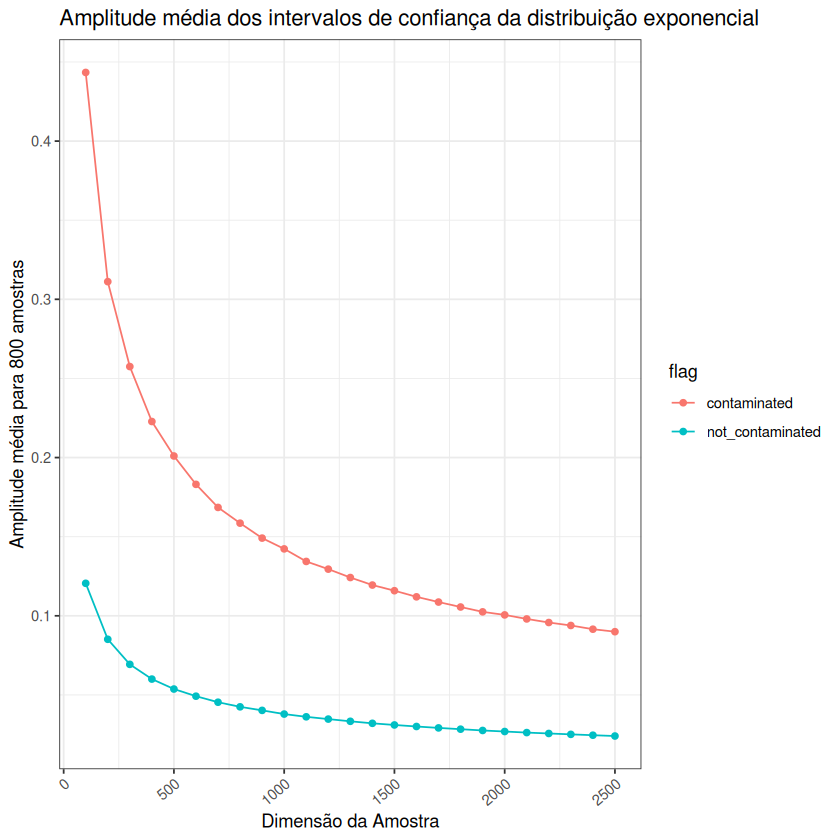

In [8]:
ggplot(df, aes(x = dimensions, y = mean_widths, colour = flag)) +
  geom_line() +
  geom_point() +
  labs(x = "Dimensão da Amostra", y = "Amplitude média para 800 amostras") +
  ggtitle("Amplitude média dos intervalos de confiança da distribuição exponencial") +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 40, hjust=1))